In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [14]:
import matplotlib.pyplot as plt

In [2]:
file_path = "C:/Users/Subhayu Kabiraj/OneDrive/Desktop/Prediction of Field Emission Performance of MMC in UHV systems/Stage_1/raw_datasets/"

In [3]:
files = [
    'JE FN Final_Pure_Al.xlsx', 'JE FN Final_AlGr0.5.xlsx', 'JE FN Final_AlGr1.xlsx'
]
data = {}

In [4]:
for file in files:
    df = pd.read_excel(file_path + file)
    data[file.replace('.xlsx', '')] = df

In [5]:
data = pd.concat([data["JE FN Final_Pure_Al"], data["JE FN Final_AlGr0.5"], data["JE FN Final_AlGr1"]])
X = data[["E"]].values.reshape(-1, 1)
y = data["J"].values


In [6]:
gpr = GaussianProcessRegressor(kernel=C(1.0) * RBF(1.0))
svr = SVR(kernel='rbf')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
poly = make_pipeline(PolynomialFeatures(3), SVR(kernel='linear'))

In [7]:
gpr.fit(X, y)

C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1))

In [8]:
svr.fit(X, y)

SVR()

In [9]:
rf.fit(X, y)


RandomForestRegressor(random_state=42)

In [10]:
poly.fit(X, y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('svr', SVR(kernel='linear'))])

In [11]:
E_values = np.linspace(data["E"].min(), data["E"].max(), 100).reshape(-1, 1)

In [12]:
for material in ["AlGr1.25", "AlGr1.5", "AlGr1.75", "AlGr2"]:
    predictions = pd.DataFrame({
        "E": E_values.flatten(),
        "J_GPR": gpr.predict(E_values),
        "J_SVR": svr.predict(E_values),
        "J_RF": rf.predict(E_values),
        "J_3-Degree Polynomial Regression": poly.predict(E_values)
    })
    predictions.to_excel(f"{material}_predictions.xlsx", index=False)


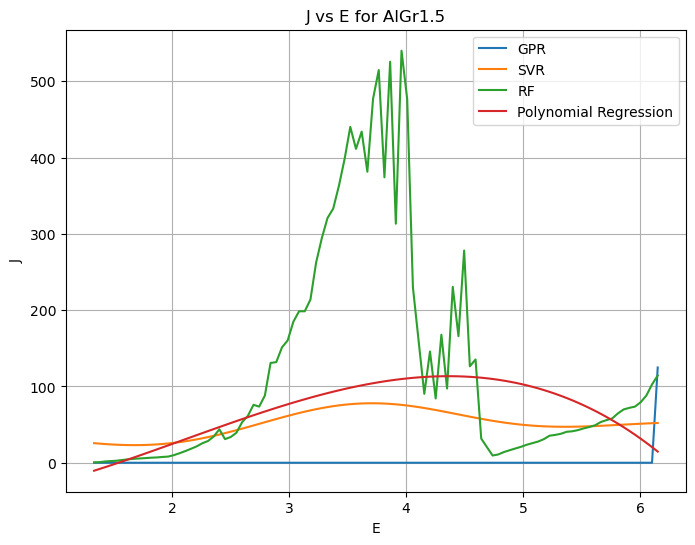

In [15]:
algr1_5_data = pd.read_excel("AlGr1.5_predictions.xlsx")
plt.figure(figsize=(8, 6))
plt.plot(algr1_5_data["E"], algr1_5_data["J_GPR"], label="GPR")
plt.plot(algr1_5_data["E"], algr1_5_data["J_SVR"], label="SVR")
plt.plot(algr1_5_data["E"], algr1_5_data["J_RF"], label="RF")
plt.plot(algr1_5_data["E"], algr1_5_data["J_3-Degree Polynomial Regression"], label="Polynomial Regression")
plt.xlabel("E")
plt.ylabel("J")
plt.title("J vs E for AlGr1.5")
plt.legend()
plt.grid()
plt.show()

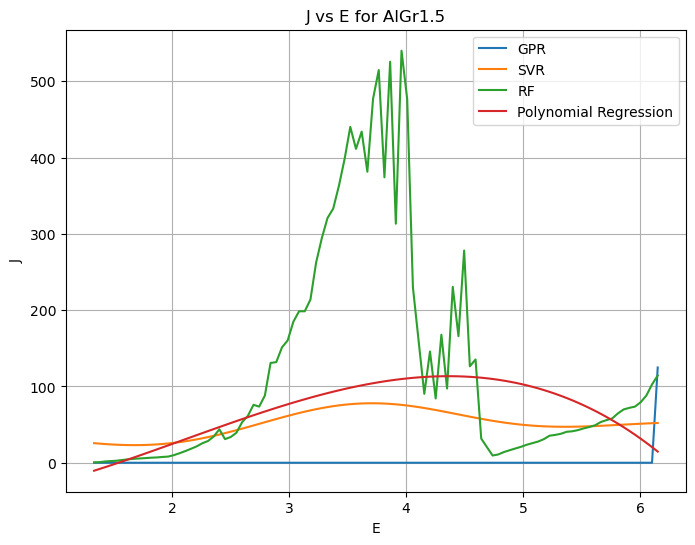

In [16]:
algr1_5_data = pd.read_excel("AlGr1.25_predictions.xlsx")
plt.figure(figsize=(8, 6))
plt.plot(algr1_5_data["E"], algr1_5_data["J_GPR"], label="GPR")
plt.plot(algr1_5_data["E"], algr1_5_data["J_SVR"], label="SVR")
plt.plot(algr1_5_data["E"], algr1_5_data["J_RF"], label="RF")
plt.plot(algr1_5_data["E"], algr1_5_data["J_3-Degree Polynomial Regression"], label="Polynomial Regression")
plt.xlabel("E")
plt.ylabel("J")
plt.title("J vs E for AlGr1.5")
plt.legend()
plt.grid()
plt.show()

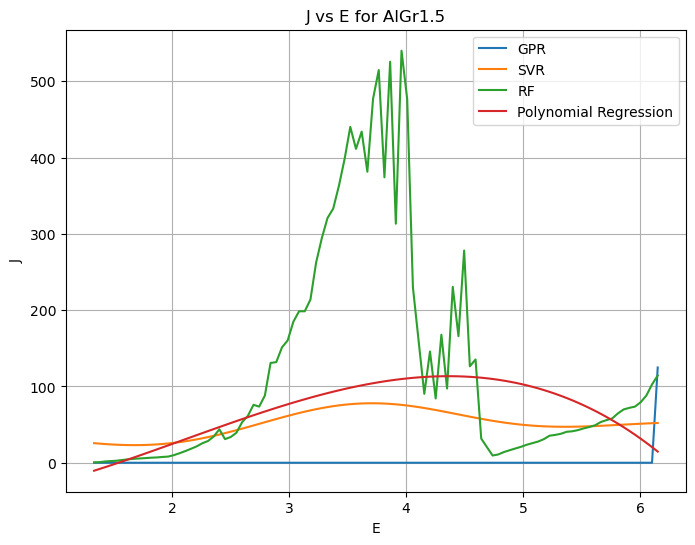

In [17]:
algr1_5_data = pd.read_excel("AlGr1.75_predictions.xlsx")
plt.figure(figsize=(8, 6))
plt.plot(algr1_5_data["E"], algr1_5_data["J_GPR"], label="GPR")
plt.plot(algr1_5_data["E"], algr1_5_data["J_SVR"], label="SVR")
plt.plot(algr1_5_data["E"], algr1_5_data["J_RF"], label="RF")
plt.plot(algr1_5_data["E"], algr1_5_data["J_3-Degree Polynomial Regression"], label="Polynomial Regression")
plt.xlabel("E")
plt.ylabel("J")
plt.title("J vs E for AlGr1.5")
plt.legend()
plt.grid()
plt.show()

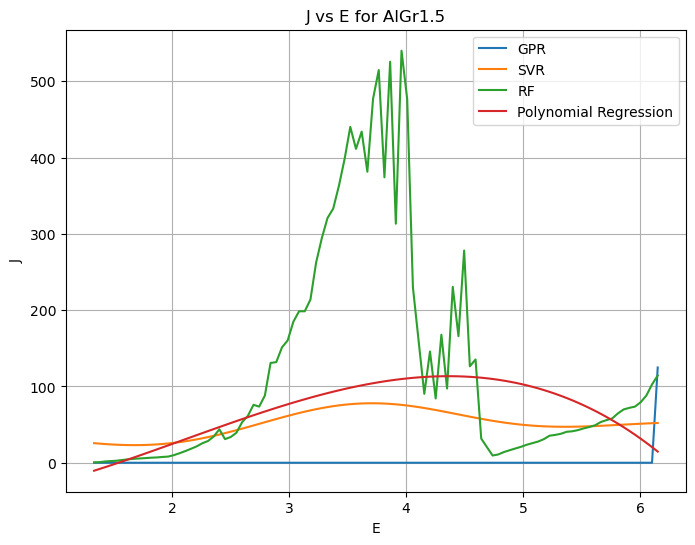

In [18]:
algr1_5_data = pd.read_excel("AlGr2_predictions.xlsx")
plt.figure(figsize=(8, 6))
plt.plot(algr1_5_data["E"], algr1_5_data["J_GPR"], label="GPR")
plt.plot(algr1_5_data["E"], algr1_5_data["J_SVR"], label="SVR")
plt.plot(algr1_5_data["E"], algr1_5_data["J_RF"], label="RF")
plt.plot(algr1_5_data["E"], algr1_5_data["J_3-Degree Polynomial Regression"], label="Polynomial Regression")
plt.xlabel("E")
plt.ylabel("J")
plt.title("J vs E for AlGr1.5")
plt.legend()
plt.grid()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
models = {"GPR": gpr, "SVR": svr, "RF": rf, "Polynomial Regression": poly}
metrics = {}

In [21]:
for name, model in models.items():
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
    metrics[name] = {"MSE": mse, "RMSE": rmse, "R2": r2, "Adj R2": adj_r2}


In [22]:
for model, values in metrics.items():
    print(f"{model} Metrics:")
    for metric, value in values.items():
        print(f"  {metric}: {value:.4f}")
    print()

GPR Metrics:
  MSE: 38337.0605
  RMSE: 195.7985
  R2: 0.4547
  Adj R2: 0.4519

SVR Metrics:
  MSE: 81485.6235
  RMSE: 285.4569
  R2: -0.1591
  Adj R2: -0.1650

RF Metrics:
  MSE: 40040.3712
  RMSE: 200.1009
  R2: 0.4304
  Adj R2: 0.4275

Polynomial Regression Metrics:
  MSE: 75090.9008
  RMSE: 274.0272
  R2: -0.0682
  Adj R2: -0.0736

